# Proyek Analisis Data: Nama dataset
- Nama: Yolanda Enza Wella
- Email: yolandaenza20@gmail.com
- Id Dicoding: yolandaenza20

## Menentukan Pertanyaan Bisnis

- Question 1 : What is the most common level of air pollutants in Aotizhongxin?
- Question 2 : What is the air quality over a period of time (daily), (monthly), and (yearly)?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Load the dataset
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

# Display the first few rows to understand the data
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Assessing Data

In [4]:
# Data overview
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nSummary Statistics:")
print(df.describe())

Number of rows: 35064
Number of columns: 18

Summary Statistics:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [6]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


### Cleaning Data

In [7]:
df.dropna(inplace=True)

In [12]:
#overview of Dataset
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\n NUmber of features:", df.shape[1])
    print("\n Features:")
    print(df.columns.tolist())
    print("\n Missing Values:", df.isna().sum().values.sum())
    print("\n Unique values:")
    print(df.nunique())

dataoverview(df,'Overview of the Dataset')

Overview of the Dataset:

Rows: 31815

 NUmber of features: 18

 Features:
['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 Missing Values: 0

 Unique values:
No         31815
year           5
month         12
day           31
hour          24
PM2.5        517
PM10         601
SO2          255
NO2          246
CO           111
O3           544
TEMP         923
PRES         596
DEWP         602
RAIN         124
wd            16
WSPM          91
station        1
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore the most common value for each pollutant

In [16]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari nilai yang paling umum untuk setiap polutan
most_common_pollutants = {}
for pollutant in pollutants:
    most_common_pollutant = df[pollutant].mode().values[0]
    most_common_pollutants[pollutant] = most_common_pollutant

# Menampilkan polutan udara paling umum dalam dataset
print("Polutan Udara Paling Umum:")
for pollutant, value in most_common_pollutants.items():
    print(f"{pollutant}: {value}")

Polutan Udara Paling Umum:
PM2.5: 9.0
PM10: 6.0
SO2: 2.0
NO2: 26.0
CO: 400.0
O3: 2.0


In [26]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = {}
for pollutant in pollutants:
    count = df[pollutant].mode().values[0]
    pollutant_counts[pollutant] = count

# Menentukan polutan udara yang paling umum
most_common_pollutant = max(pollutant_counts, key=pollutant_counts.get)

print(f"Polutan Udara Paling Umum dalam Dataset adalah: {most_common_pollutant}")


Polutan Udara Paling Umum dalam Dataset adalah: CO


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

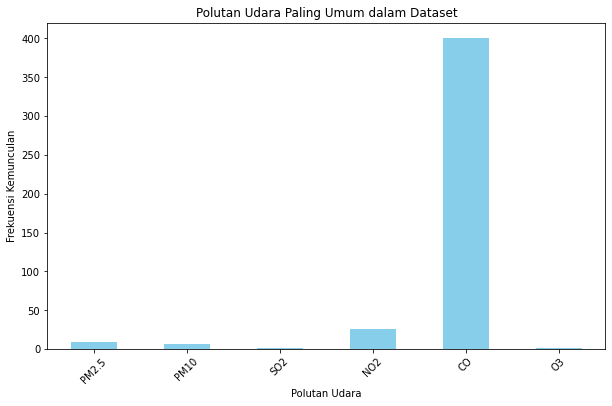

In [27]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = df[pollutants].mode().iloc[0]

# Membuat diagram batang untuk polutan yang paling umum
plt.figure(figsize=(10, 6))
pollutant_counts.plot(kind='bar', color='skyblue')
plt.title('Polutan Udara Paling Umum dalam Dataset')
plt.xlabel('Polutan Udara')
plt.ylabel('Frekuensi Kemunculan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: 

- Harian

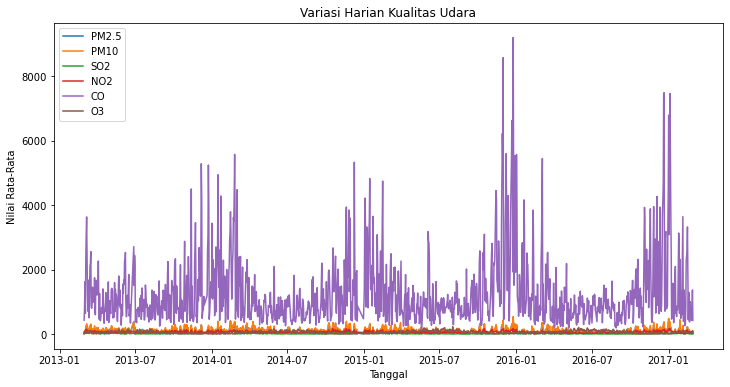

In [28]:
# Konversi kolom 'year', 'month', 'day' menjadi tipe data datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Agregasi data harian
daily_data = df.groupby('date').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data harian
plt.figure(figsize=(12, 6))
for column in daily_data.columns:
    plt.plot(daily_data.index, daily_data[column], label=column)

plt.title('Variasi Harian Kualitas Udara')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

- Bulanan

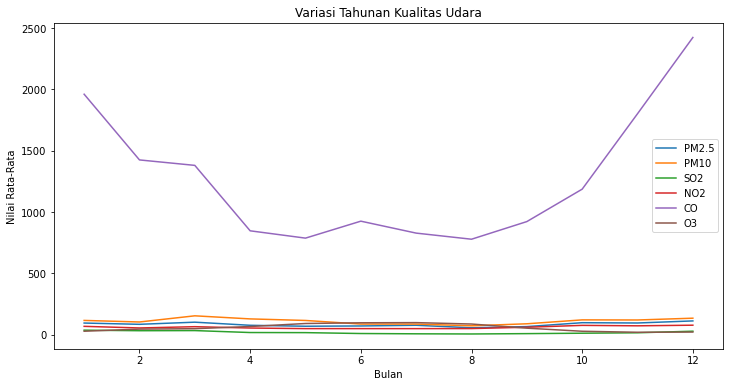

In [30]:
# Agregasi data bulanan
annual_data = df.groupby('month').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data bulanan
plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Variasi Tahunan Kualitas Udara')
plt.xlabel('Bulan')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()


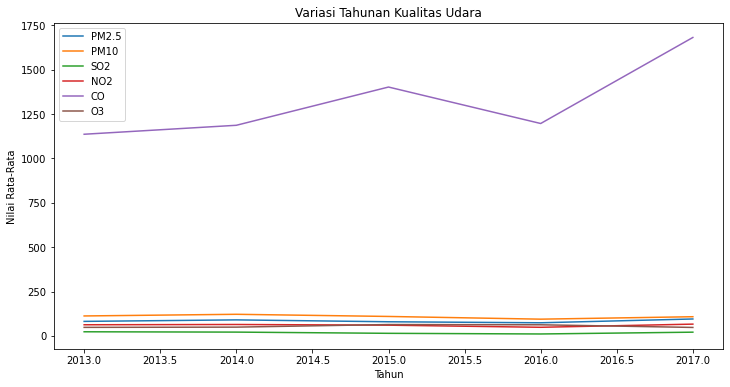

In [31]:
# Agregasi data tahunan
annual_data = df.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data tahunan
plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Variasi Tahunan Kualitas Udara')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Polutan udara yang paling umum di Aotizhongxin adalah CO.
- conclution pertanyaan 2 : Berdasarkan analisis harian, bulanan dan tahunan CO menempati posisi paling tinggi dari polutan lainnya dengan kualitas yang semakin meningkat pada tah